In [1]:
import pandas as pd
import numpy as np
import string
import re
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PolaritySubjectivity import *

In [9]:
## Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

## Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also","iv", "one", "two", "new",
             "previously", "shown","covid","twitter","situation","la","corona","pic",
             "com","http","bit","ly","india","people","nan'","nan","html'","html'","nan","html '"]
stop_words = stop_words.union(new_words)

# Corpus creation
def CorpusCreation(text,count):
    corpus = []
    for i in range(0, count):
        # Remove punctuations
        txt = re.sub('[^a-zA-Z]', ' ', str(text.iloc[i]))

        # Convert to lowercase
        txt = txt.lower()

        # remove tags
        txt = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", txt)

        # Remove special characters and digits
        txt = re.sub("(\\d|\\W)+", " ", txt)

        ## Convert to list from string
        txt = txt.split()

        ## Stemming
        ps = PorterStemmer()
        # Lemmatisation
        lem = WordNetLemmatizer()
        txt = [lem.lemmatize(word) for word in txt if not word in
                stop_words]
        txt = " ".join(txt)
        corpus.append(txt)
    return corpus
    
# Plot the Word Cloud
def wordCloud(corpus,name):
    wordCloud = WordCloud(background_color='white',
                    max_words=100,
                    max_font_size=50,
                    random_state=42).generate(str(corpus))
    plt.figure(figsize=(20,20))
    plt.imshow(wordCloud,interpolation ='bilinear')
    plt.axis('off')
    plt.show()
    wordCloud.to_file(name)

In [3]:
# Read data into csv
df=pd.read_csv('tweet_dataset.csv')

# Creating columns for analysis
df['Subjectivity'] = df['text'].apply(getSubjectivity)
df['Polarity'] = df['text'].apply(getPolarity)
df['Analysis'] = df['Polarity'].apply(getAnalysis)

C:\Users\fcc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,6,7,9,10,11,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Creating dataframe for different sentiments

Pos = df[df['Analysis']=='Positive']
Neg = df[df['Analysis']=='Negative']
Neu = df[df['Analysis']=='Neutral']

pos_count = [i for i in range(len(Pos))]
Pos = Pos.reindex(pos_count)

neg_count = [i for i in range(len(Neg))]
Neg = Neg.reindex(neg_count)

print('Positive and Negative sentiments dataframe created')

Positive and Negative sentiments dataframe created


In [5]:
# Creating list of words for wordcloud

allWords = CorpusCreation(df['text'],df.shape[0])
goodWords = CorpusCreation(Pos['text'],Pos.shape[0])
badWords = CorpusCreation(Neg['text'],Neg.shape[0])

WordCloud of all words


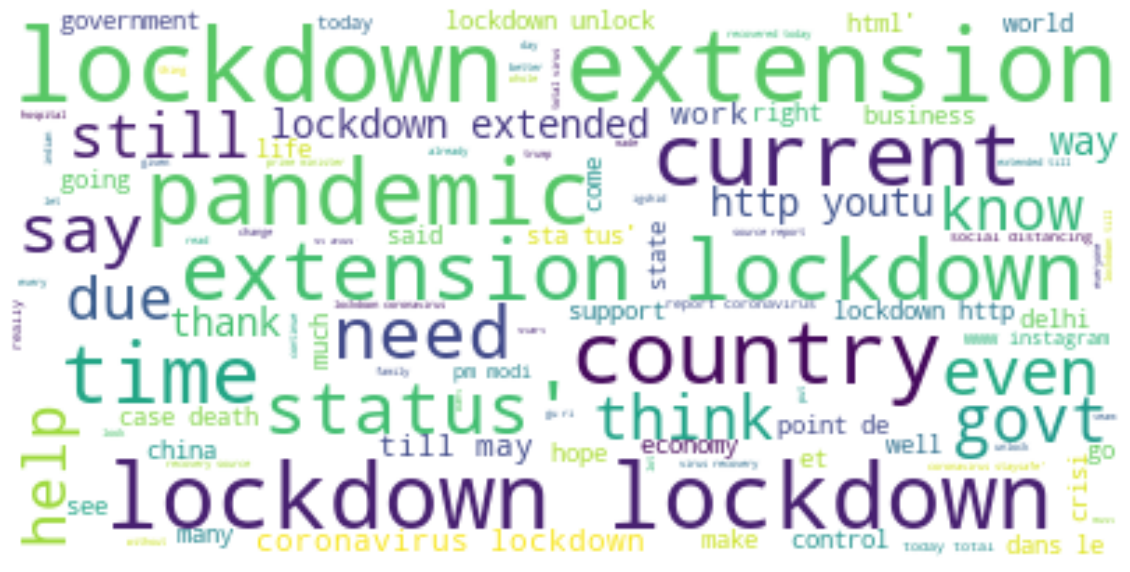



WordCloud of good words


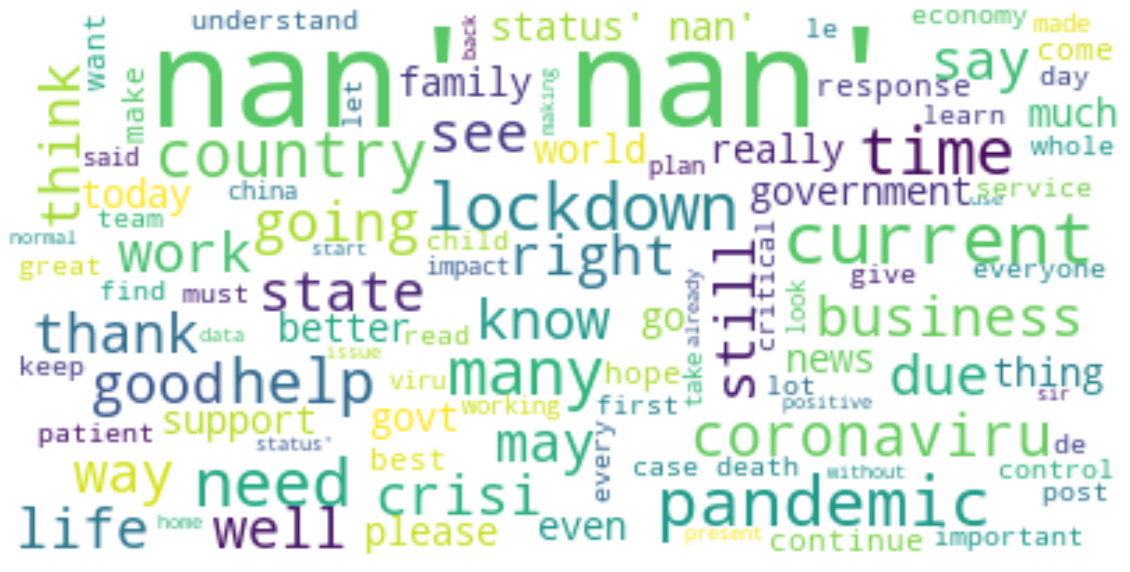



WordCloud of bad words


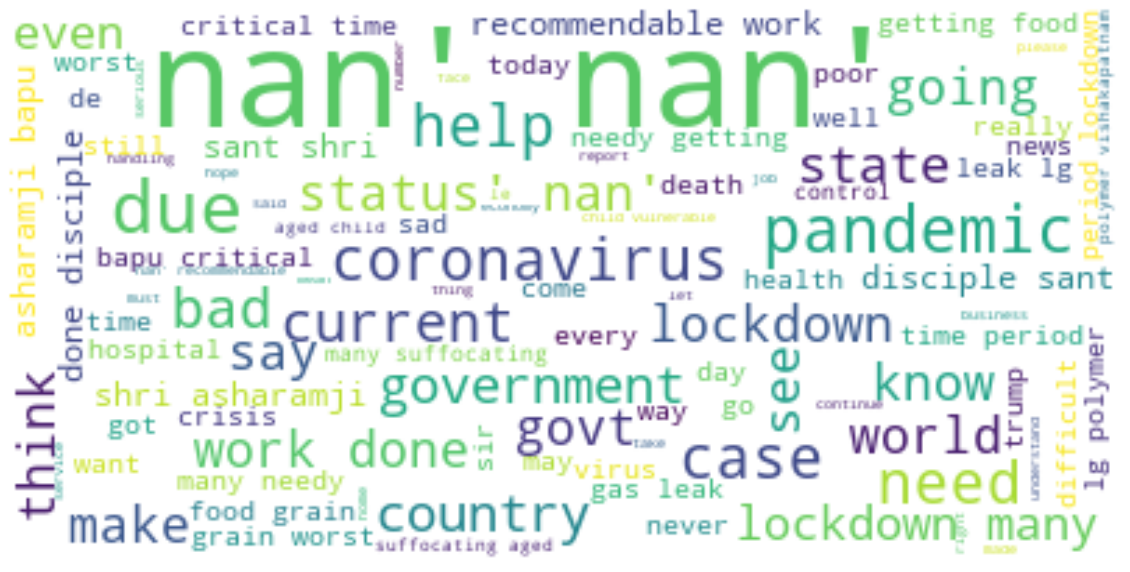

In [10]:
# Generating Word Cloud

print('WordCloud of all words')
wordCloud(allWords,'AllWords.png')
print()
print()
print('WordCloud of good words')
wordCloud(goodWords,'GoodWords.png')
print()
print()
print('WordCloud of bad words')
wordCloud(badWords,'BadWords.png')